## Transformations in Political Economy - Technological Change and Populism (POL63102)
### Coding Session 2: Linear Regression

---
This document guides you through coding session 2. Please try to follow the instructions on your own PC and feel free to ask questions if something is unclear. After this session you should be able to do the following:

- Implement Simple Linear Regression in Python
- Interprete Results from Simple Linear Regression
---

#### Importing Modules and Loading Data

Linear regression is a standard tool for analyzing the relationship between two or more variables.

Let's start with importing the modules needed for our analysis. In addition to **pandas**, **seaborn**, and **matplotlib**, we will also use **numpy** for numerical calculus and **statsmodels** to estimate, interpret, and visualize linear regression models.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

As in Coding Session 1, let's use the data from Autor et al. (2020).

In [2]:
df = pd.read_stata('C:/Users/felix/Dropbox/HfP/Teaching/SoSe21/Populism_Course/data/Autor_data_extract.dta')

#### Visualisation of Linear Regression

One question in the paper is whether higher import competition leads to higher vote shares for the Republican party in the 2016 election as compared to the 2002 election. Thus, we can write a simple linear regression model as follows:

\begin{align}
\Delta \text{Republican Vote Share}_i = \beta_0 + \beta_1 \text{Import Competition}_i + u_i
\end{align}

where
* $i$ indexes observations (county-district cells in the US)
* $\beta_0$ is the intercept of the linear trend line on the y-axis
* $\beta_1$ is the slope of the linear trend line, representing the marginal effect of a unit change in $\text{Import Competition}_i$ on $\Delta \text{Republican Vote Share}_i$
* $u_i$ is the error term (deviations of observations from the linear trend due to factors not included in the model)

Let's first visualise this regression by overlaying a scatterplot with a linear fit using the *regplot()* function from **seaborn**. If you delete the "#" (i.e. "uncomment") and run the line below, you can see the help description for this command.


In [3]:
# help(sns.regplot)

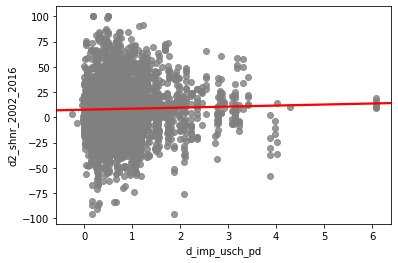

In [4]:
# Define y and x
y = df["d2_shnr_2002_2016"]
x = df["d_imp_usch_pd"]

#create scatterplot with regression line (without confidence bands)
sns.regplot(x, y, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

As you can see, there seems to be a slightly positive relationship. However, is the slope statistically significantly different from zero? Let's use a regression model to test this. Note that ordinary least squares (OLS) find the slope and estimate its standard deviation by minimizing the *sum of squared residuals*, i.e. the squared differences between observations and the predicated value of the dependent variable.

#### Implementation of Ordinary Least Squares (OLS)

To estimate the constant term $\beta_0$, we need to add a column of 1's to our dataset (consider the equation above).

In [5]:
df['const']=1

Now we can construct our model in **statsmodels** using the ols function. Note that the syntax for the formula in the brackets is "y ~ x", i.e. regress y on x.

In [10]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model
    data : array-like
        The data for the model. See Notes.
    subset : array-like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`
    drop_cols : array-like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    args : extra arguments
        These are passed to the model
    kwargs : extra keyword arguments
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.Eval

In [7]:
reg1 = smf.ols('d2_shnr_2002_2016 ~ d_imp_usch_pd', data=df)
type(reg1)

statsmodels.regression.linear_model.OLS

So far we have simply constructed our model.

We need to use *.fit()* to obtain parameter estimates $\hat \beta_0$ and $\hat \beta_1$

In [8]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

#### Interpretation of Results

We now have the fitted regression model stored in *results*.

To view the OLS regression results, we can call the *.summary()* method.

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      d2_shnr_2002_2016   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.490
Date:                Fri, 11 Jun 2021   Prob (F-statistic):              0.115
Time:                        14:56:14   Log-Likelihood:                -17616.
No. Observations:                3767   AIC:                         3.524e+04
Df Residuals:                    3765   BIC:                         3.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5867      0.647     11.724

From our results, we see that

The intercept $\hat \beta_0 = 7.5867 $ 

The slope $\hat \beta_1 = 1.0229$

The positive  parameter estimate implies that import competition has a positive effect on economic outcomes, as we saw in the figure.

The p-value of 0.115 for import competition implies that the effect of institutions on GDP is not statistically significant (using p < 0.05 or p < 0.1 as a rejection rule).

The R-squared value of 0.001 indicates that around 0.1% of variation in Delta 2002-2016 Republican Vote Share is explained by import competition.

Using our parameter estimates, we can now write our estimated relationship as

\begin{align}
\widehat{\Delta \text{Republican Vote Share}_i} = 7.5867 + 1.0229 \text{Import Competition}_i
\end{align}

This equation describes the line that best fits our data, as shown in the scatter plot with the linear fit above.

We can use this equation to predict the level of Delta 2002-2016 Republican Vote Share for a value of the index import competition.

**Exercise:** Implement a linear regression with a different dependent or independent variable from the data at hand. What do you find?

---
**Congratulations! This is the end of coding session 2.**